# Preprocessing Funactions

In [12]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the image from a file
def prepro(x):
# Get the dimensions of the image
    height, width = x.shape[:2]

    # Calculate the center of the image
    center_x, center_y = width // 2, height // 2

    # Define the crop size and calculate the start point for cropping
    crop_size = 85
    start_x = center_x - crop_size // 2
    start_y = center_y - crop_size // 2

    # Crop the image
    cropped_image = x[start_y:start_y+crop_size, start_x:start_x+crop_size]
    return cropped_image

In [13]:
#  Create a function that takes in a list of images and displays them in a grid
def show_images(images, title):
    fig, axs = plt.subplots(1, len(images), figsize=(15, 5))
    fig.suptitle(title, fontsize=16)
    for i, image in enumerate(images):
        axs[i].imshow(image)
        axs[i].axis('off')
    plt.show()


In [14]:
import numpy as np
from scipy.ndimage import center_of_mass

# Load your images
# Let's assume 'image_data' is a 3D NumPy array containing your images stacked along the first axis
# For demonstration, replace with the actual loading code
# For example: image_data = np.load('path_to_your_images.npy')

# Calculate the center of intensity (centroid) for each image

def centroid(image):
    # Convert to grayscale if the image is in color
    if image.ndim == 3 and image.shape[2] in [3, 4]:  # Checking for RGB or RGBA
        image = image.mean(axis=2)  # Converting to grayscale by averaging channels
    
    # Calculate the center of mass, which is the intensity-weighted centroid of the image
    centroid = center_of_mass(image)
    return centroid

In [15]:

# plot with the centroid for all 3 categories
def plot_with_centroid(sphere_prepro_images, no_prepro_images, vortex_prepro_images, sphere_centroids, no_centroids, vortex_centroids):
    
    no_of_y_axis = max([len(sphere_prepro_images), len(no_prepro_images), len(vortex_prepro_images)])

    fig, axs = plt.subplots(3,no_of_y_axis, figsize=(5*no_of_y_axis, 15))    
    
    fig.suptitle('Centroids of the images', fontsize=16)

    def plot_images(images, centroids, title, axs):
        i = 0
        for image, centroid in zip(images, centroids):
            axs[i].imshow(image,cmap='inferno')
            axs[i].scatter(centroid[1], centroid[0], c='r', s=100, marker='x')
            axs[i].axis('off')
            axs[i].set_title(title+'_'+str(i))
            i+=1

    plot_images(sphere_prepro_images, sphere_centroids, 'Sphere', axs[0])
    plot_images(no_prepro_images, no_centroids, 'No_vortex', axs[1])
    plot_images(vortex_prepro_images, vortex_centroids, 'Vortex', axs[2])

    plt.show()

In [16]:

# plot with the centroid for all 3 categories

def plot_darknatter_images(sphere_prepro_images, no_prepro_images, vortex_prepro_images):

    no_of_y_axis = max([len(sphere_prepro_images), len(no_prepro_images), len(vortex_prepro_images)])

    fig, axs = plt.subplots(3,no_of_y_axis, figsize=(5*no_of_y_axis, 15))
    fig.suptitle('Darkmatter of the images', fontsize=16)

    def plot_images(images, title, axs):
        i = 0
        for image in images:
            axs[i].imshow(image,cmap='inferno')
            axs[i].axis('off')
            axs[i].set_title(title+'_'+str(i))
            i+=1

    plot_images(sphere_prepro_images,'Sphere', axs[0])
    plot_images(no_prepro_images, 'No_vortex', axs[1])
    plot_images(vortex_prepro_images, 'Vortex', axs[2])

    plt.show()

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import center_of_mass, gaussian_gradient_magnitude

# Function to find and mark the increasing intensity regions
def mark_increasing_intensity(image, centroid):
    # Compute the magnitude of the gradient
    gradient_magnitude = gaussian_gradient_magnitude(image, sigma=1)

    # Now, identify where the gradient magnitude is above a certain threshold
    # We choose a threshold that is significant to mark the increase
    # This threshold may need to be adjusted depending on the image characteristics
    threshold = np.percentile(gradient_magnitude, 90)  # for example, use the 90th percentile
    increasing_intensity = gradient_magnitude > threshold

    # Create a copy of the image to overlay the marks
    marked_image = np.copy(image)
    marked_image[increasing_intensity] = np.max(image)  # This sets the pixels to the maximum intensity value

    # Mark the centroid with a blue cross
    marked_image = np.stack((marked_image,)*3, axis=-1)  # Convert to RGB
    cross_size = 5  # The size of the cross to draw
    cx, cy = int(centroid[0]), int(centroid[1])
    marked_image[cy-cross_size:cy+cross_size, cx, 2] = 0  # Blue vertical line
    marked_image[cy, cx-cross_size:cx+cross_size, 2] = 0  # Blue horizontal line

    return marked_image

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import measurements

def radial(data):
    # center = (cropped_image.shape[0]//2, cropped_image.shape[1]//2)
    if data.ndim == 3 and data.shape[2] in [3, 4]:  # Checking for RGB or RGBA
        data = data.mean(axis=2)  # Converting to grayscale by averaging channels
    # Calculate the center of mass, which is the intensity-weighted centroid of the image
        
    center = center_of_mass(data)
    y, x = np.indices((data.shape))
    r = np.sqrt((x - center[0])**2 + (y - center[1])**2)
    r = r.astype(int)  # Convert radius values to intege
    #ignore the pixel having intensity 0.015366430260047281
    r = np.where(data == 0.015366430260047281, 0, r)
    tbin = np.bincount(r.ravel(), data.ravel())  # sum of intensity values at each radius
    nr = np.bincount(r.ravel()) 
    radialprofile = tbin / nr
    return radialprofile


def plot_radial_profile(sphere_prepro_images, no_prepro_images, vortex_prepro_images):
    no_of_y_axis = max([len(sphere_prepro_images), len(no_prepro_images), len(vortex_prepro_images)])

    fig, axs = plt.subplots(3, no_of_y_axis, figsize=(15, 15))
    fig.suptitle('Radial profile of the images', fontsize=16)
    

    def plot_radial(images, title, axs):
        i = 0
        for image in images:
            radialprofile = radial(image)
            peak_intensity = np.max(radialprofile)
            peak_radius = np.argmax(radialprofile)
            print(f"The radius where intensity peaks is for {title+'_'+str(i)} {peak_radius}")
            axs[i].plot(peak_radius, peak_intensity, 'ro')
            axs[i].plot(radialprofile)
            axs[i].set_xlabel('Radius')
            axs[i].set_ylabel('Intensity')
            axs[i].set_title(title+'_'+str(i))
            i+=1

    plot_radial(sphere_prepro_images, 'Sphere', axs[0])
    plot_radial(no_prepro_images, 'No_vortex', axs[1])
    plot_radial(vortex_prepro_images, 'Vortex', axs[2])

    plt.show()



In [19]:
arr = np.array([[1,2,3],[4,5,6],[7,8,9]])


In [20]:
 np.mean(arr, axis=(0, 1))

5.0

In [21]:
np.mean( np.mean(arr, axis=(0, 1)))

5.0

In [22]:
import numpy as np
import cv2

radiuses = {}

for rad in range(80):

    x_bases_array =[]
    y_bases_array = []

    for degree in range(360):
            radian = np.deg2rad(degree)
            x_base = rad * np.cos(radian)
            y_base = rad * np.sin(radian)
            x_bases_array.append(x_base)
            y_bases_array.append(y_base)


    # x_bases_array = np.array(x_bases_array)
    # y_bases_array = np.array(y_bases_array)

    x_bases_array = np.array(x_bases_array).astype(int)
    y_bases_array = np.array(y_bases_array).astype(int)

    radiuses[rad] = (x_bases_array, y_bases_array)





def image_mean_function(img, x_start, x_end, y_start, y_end):

    def inner_function(i):
        return img[y_start[i]:y_end[i], x_start[i]:x_end[i]].mean()
    
    return inner_function

def draw_circle_and_calculate_intensity2(img, center, radius):

    x_peremeters_360 = radiuses[radius][0] + center[0]
    y_peremeters_360 = radiuses[radius][1] + center[1]

    # x_peremeters_360 = (radiuses[radius][0] + center[0]).astype(int)
    # y_peremeters_360 = (radiuses[radius][1] + center[1]).astype(int)


    x_peremeters_360_start = x_peremeters_360 - 2
    y_peremeters_360_start = y_peremeters_360 - 2

    x_peremeters_360_end = x_peremeters_360 + 3
    y_peremeters_360_end = y_peremeters_360 + 3

    x_peremeters_360_start = np.maximum(x_peremeters_360_start, 0)
    y_peremeters_360_start = np.maximum(y_peremeters_360_start, 0)
    x_peremeters_360_end = np.minimum(x_peremeters_360_end, img.shape[1])
    y_peremeters_360_end = np.minimum(y_peremeters_360_end, img.shape[0])

    # intensity_values = [ np.mean(img[y_peremeters_360_start[i]:y_peremeters_360_end[i], x_peremeters_360_start[i]:x_peremeters_360_end[i]]) for i in range(360)]
    
    ## best till now
    intensity_values = [ img[y_peremeters_360_start[i]:y_peremeters_360_end[i], x_peremeters_360_start[i]:x_peremeters_360_end[i]].mean() for i in range(360)]

    # map_function = image_mean_function(img, x_peremeters_360_start, x_peremeters_360_end, y_peremeters_360_start, y_peremeters_360_end)
    # intensity_values = list(map(map_function, range(360)))

    # intensity_values = [ np.mean(img[int(max(y_peremeters_360[i] -2, 0)):int(min(y_peremeters_360[i]+3, img.shape[0])),
    #                                 int(max(x_peremeters_360[i]-2, 0)):int(min(x_peremeters_360[i]+3, img.shape[1]))]) for i in range(360)]
    


    return intensity_values







def draw_circle_and_calculate_intensity(img, center, radius):
    img_copy = img.copy()
    cv2.circle(img_copy, center, radius, (255, 0, 0), 1)
    
    intensity_values = []
    for degree in range(360):
        radian = np.deg2rad(degree)
        x_perimeter = int(center[0] + radius * np.cos(radian))
        y_perimeter = int(center[1] + radius * np.sin(radian))
        
        x_start = max(x_perimeter - 2, 0)
        y_start = max(y_perimeter - 2, 0)
        x_end = min(x_perimeter + 3, img.shape[1])
        y_end = min(y_perimeter + 3, img.shape[0])
        
        pixel_area = img[y_start:y_end, x_start:x_end]
        average_intensity = np.mean(pixel_area, axis=(0, 1))
        overall_intensity = np.mean(average_intensity)
        intensity_values.append(overall_intensity)
    
    return intensity_values




# Example usage
# img = cv2.imread('path_to_your_image.jpg')  # Make sure your image is loaded here

# Assuming `img` is your 85x85 RGB image loaded here
# img_with_circle, intensity_values = draw_circle_and_calculate_intensity(img, center, radius)

# You can now use `img_with_circle` to see the image with the drawn circle
# and `intensity_values` to analyze the intensity around the circle.


# Load Images

In [23]:
def get_images(shpere_no, no_vortex_no, vortex_no):
    shere_raw_images = [np.load(f'train/sphere/{i}.npy') for i in shpere_no]
    no_raw_images = [np.load(f'train/no/{i}.npy') for i in no_vortex_no]
    vortex_raw_images = [np.load(f'train/vort/{i}.npy') for i in vortex_no]


    # squeeze the images
    shere_squeeze_images = [i.squeeze(0) for i in shere_raw_images]
    no_squeeze_images = [i.squeeze(0) for i in no_raw_images]
    vortex_squeeze_images = [i.squeeze(0) for i in vortex_raw_images]

    return shere_squeeze_images, no_squeeze_images, vortex_squeeze_images






In [24]:
# create array which takes numbers and then load the images onto the other array
shpere_no = [34,12,14, 8 , 7 , 9]
no_vortex_no = [74,15,13, 8 , 7 , 9]
vortex_no = [76, 77, 78, 8 , 7 , 9]


shere_squeeze_images, no_squeeze_images, vortex_squeeze_images = get_images(shpere_no, no_vortex_no, vortex_no)

shere_prepro_images = [prepro(i) for i in shere_squeeze_images]
no_prepro_images = [prepro(i) for i in no_squeeze_images]
vortex_prepro_images = [prepro(i) for i in vortex_squeeze_images]


sphere_centroids = np.array([centroid(i) for i in shere_prepro_images])
no_centroids = np.array([centroid(i) for i in no_prepro_images])
vortex_centroids = np.array([centroid(i) for i in vortex_prepro_images])



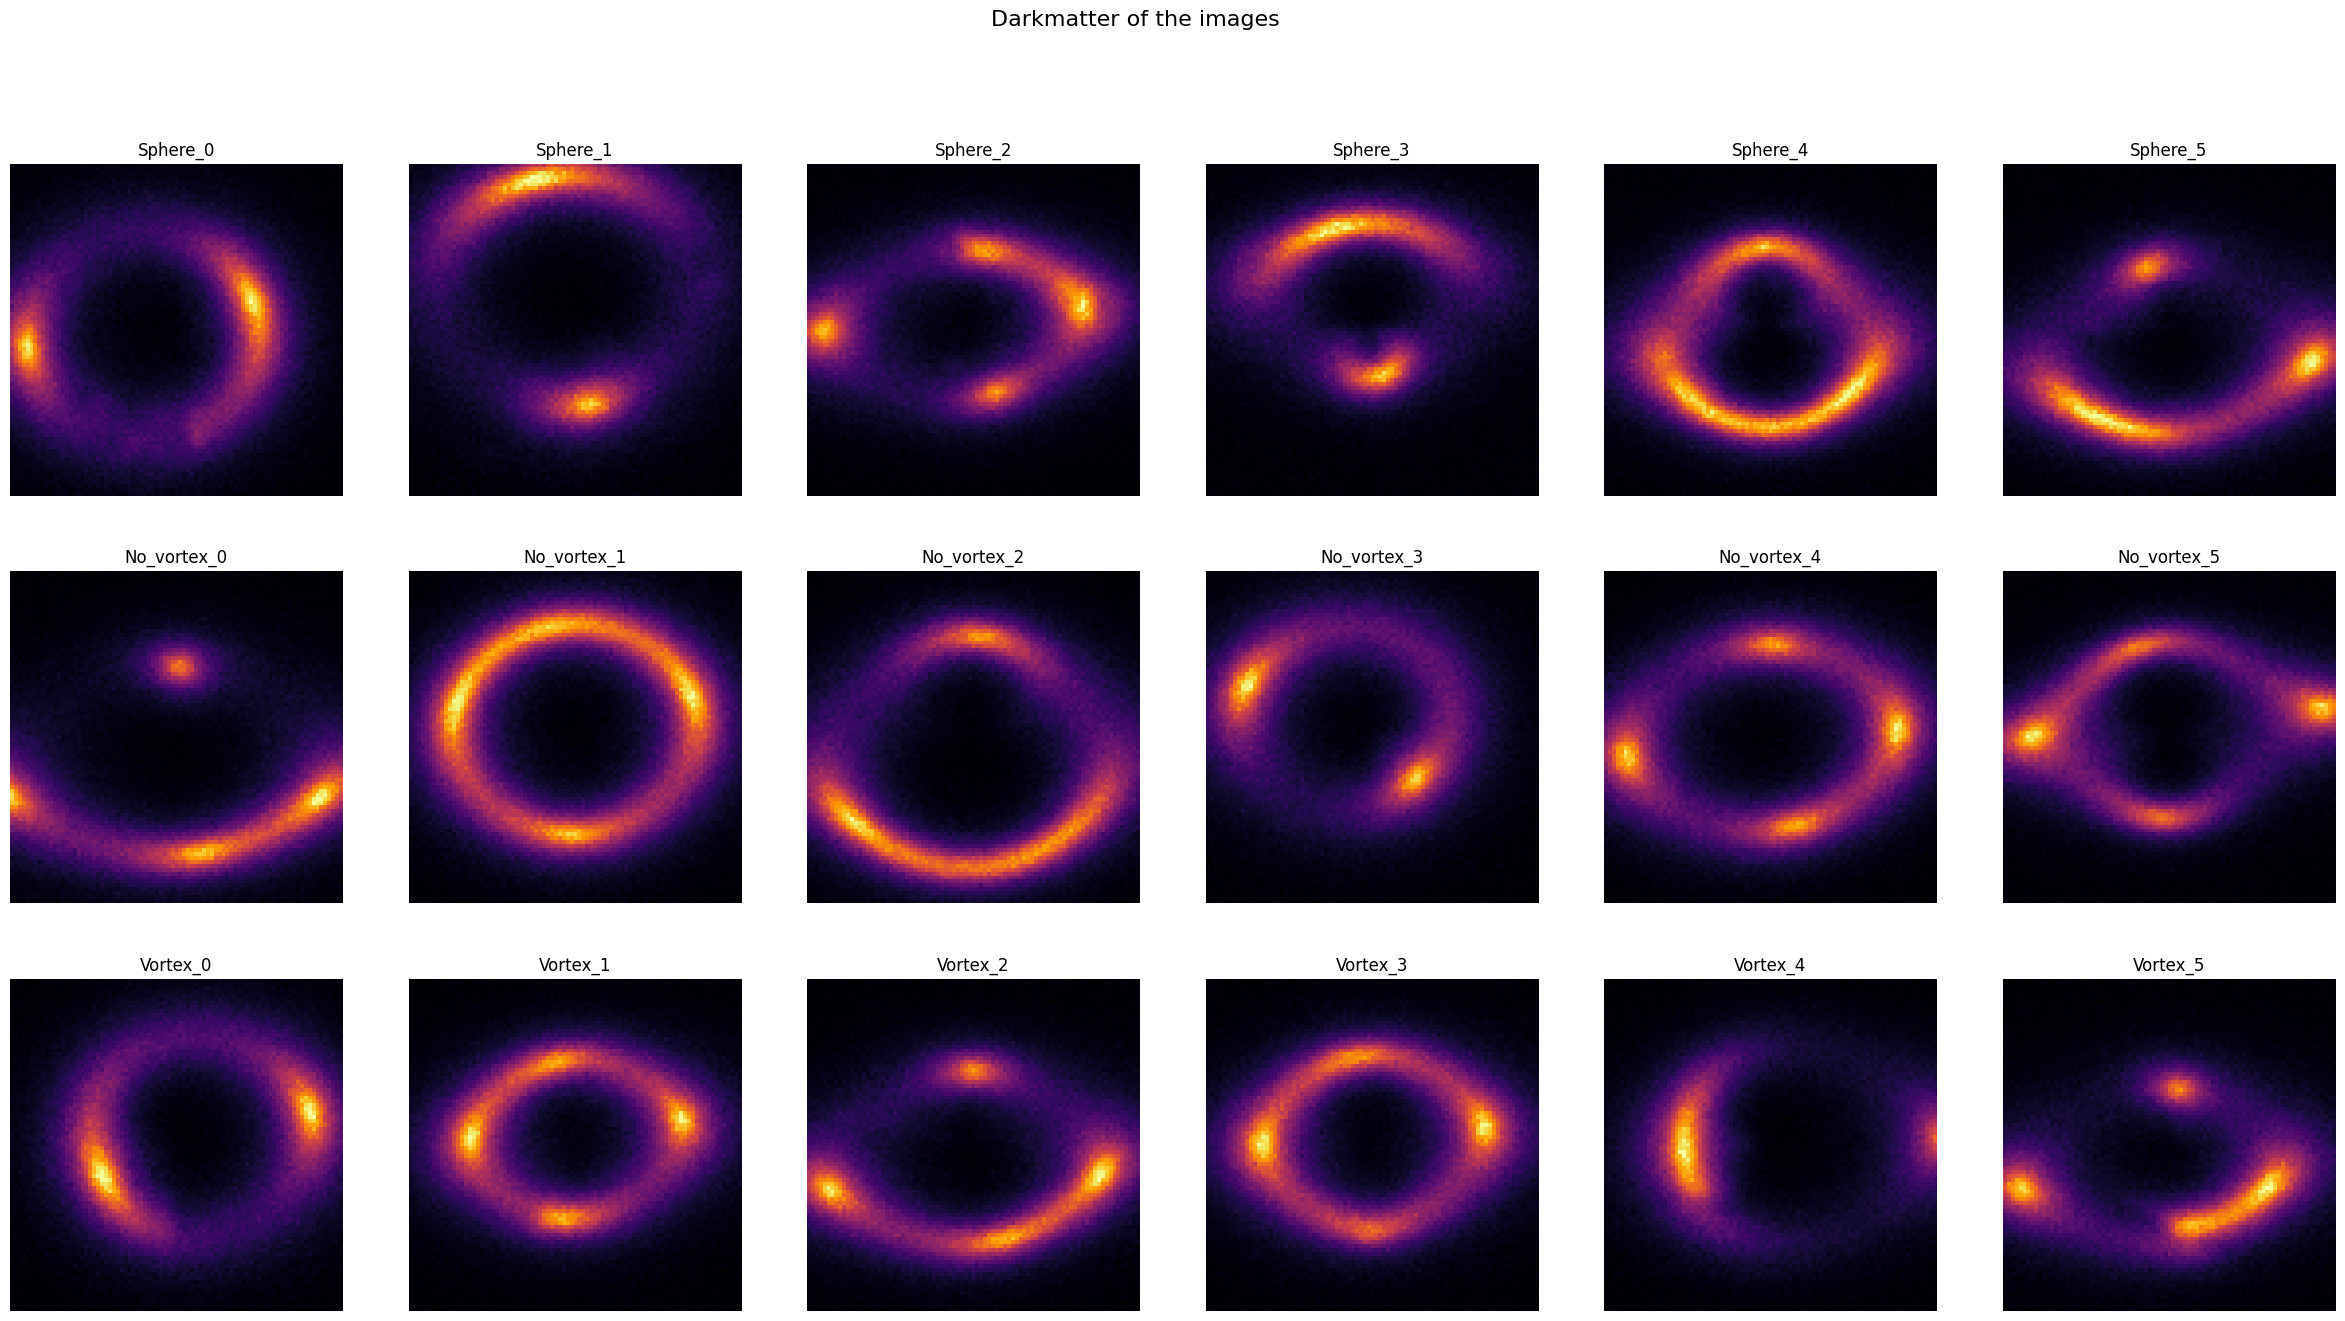

In [25]:
plot_darknatter_images(shere_prepro_images, no_prepro_images, vortex_prepro_images)

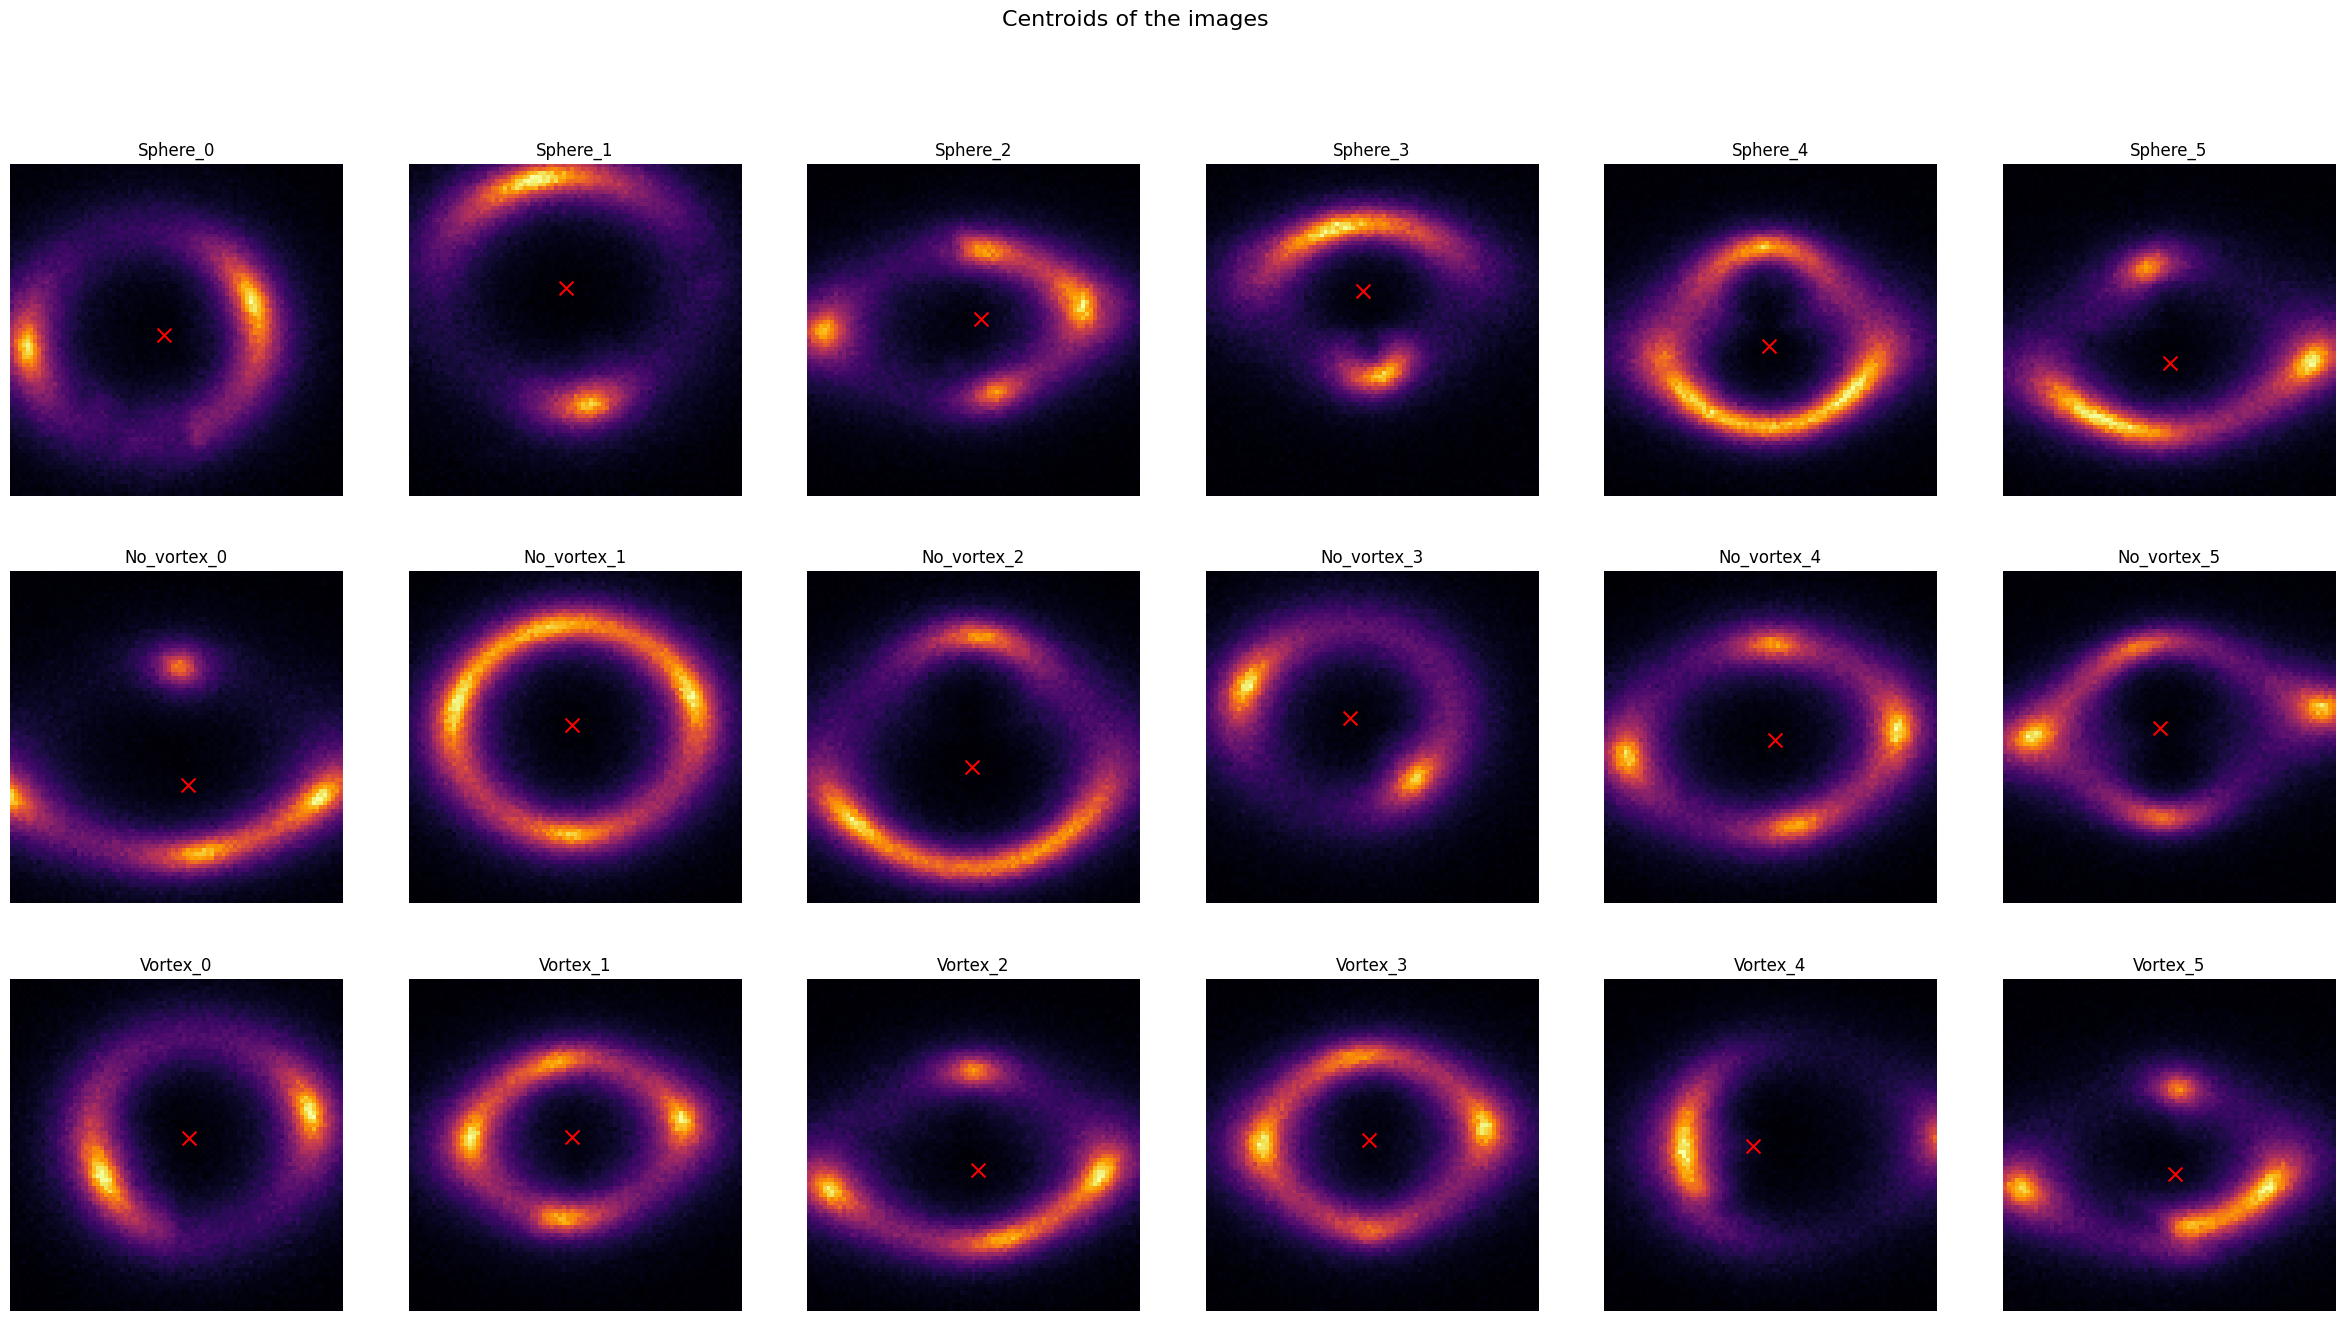

In [26]:
plot_with_centroid(shere_prepro_images, no_prepro_images, vortex_prepro_images, sphere_centroids, no_centroids, vortex_centroids)

In [27]:

sphere_marked = np.array([mark_increasing_intensity(image, centroid) for image, centroid in zip(shere_prepro_images, sphere_centroids)])
no_marked = np.array([mark_increasing_intensity(image, centroid) for image, centroid in zip(no_prepro_images, no_centroids)])
vortex_marked = np.array([mark_increasing_intensity(image, centroid) for image, centroid in zip(vortex_prepro_images, vortex_centroids)])




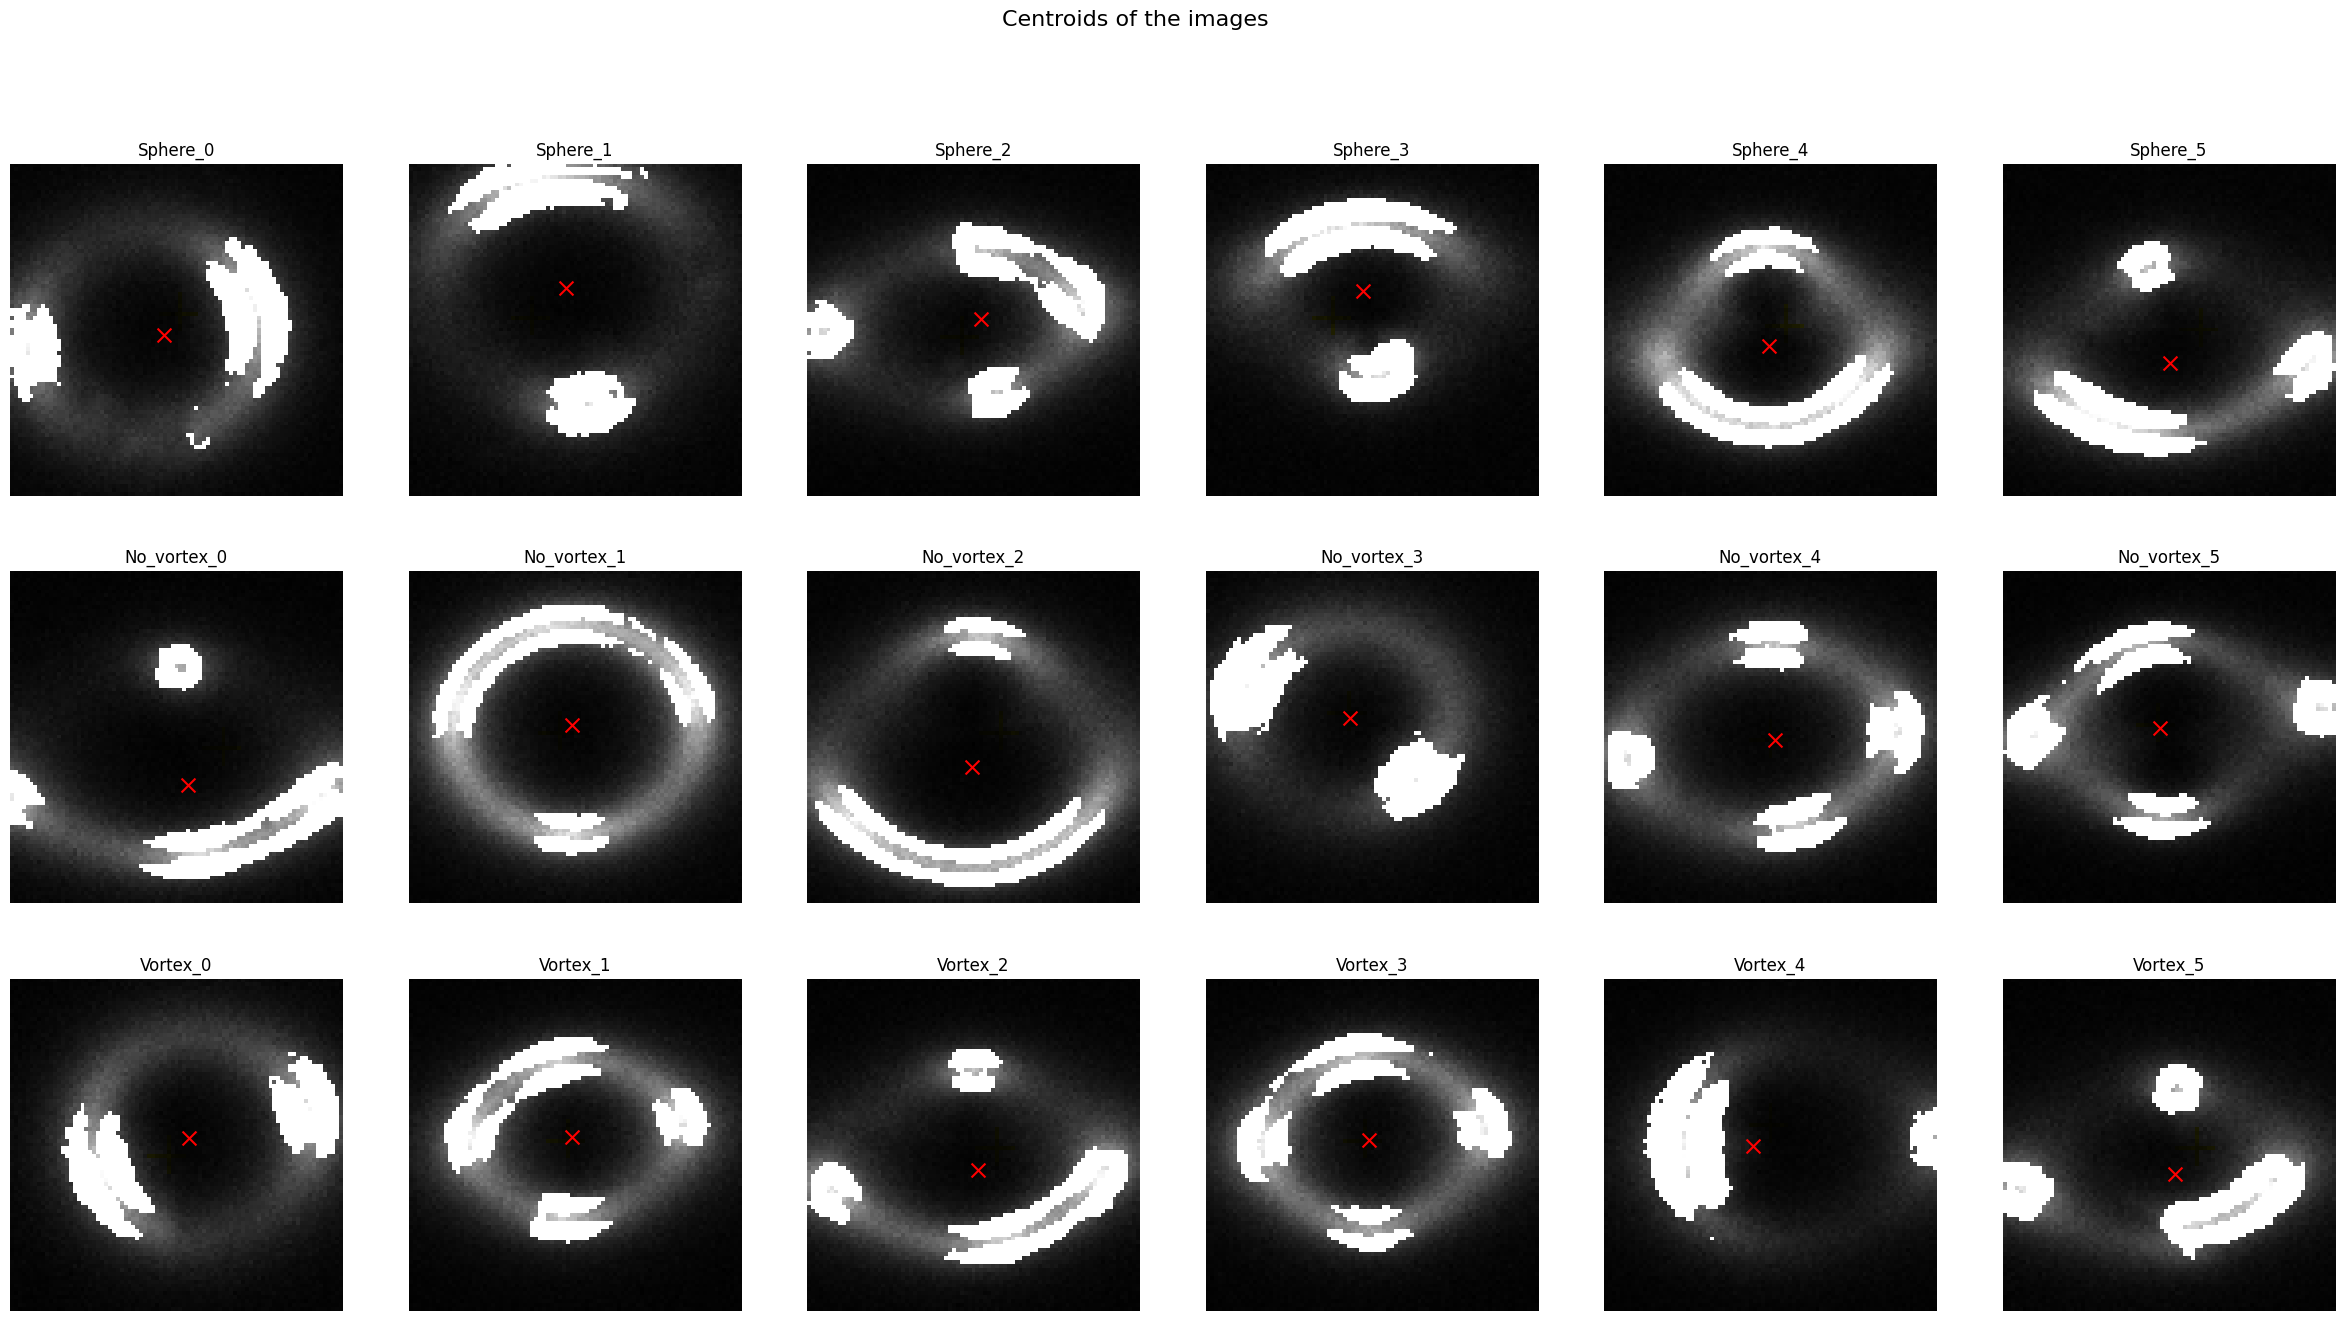

In [28]:
plot_with_centroid(sphere_marked, no_marked,vortex_marked, sphere_centroids, no_centroids, vortex_centroids)

The radius where intensity peaks is for Sphere_0 19
The radius where intensity peaks is for Sphere_1 36
The radius where intensity peaks is for Sphere_2 23
The radius where intensity peaks is for Sphere_3 21
The radius where intensity peaks is for Sphere_4 24
The radius where intensity peaks is for Sphere_5 27
The radius where intensity peaks is for No_vortex_0 26
The radius where intensity peaks is for No_vortex_1 27
The radius where intensity peaks is for No_vortex_2 30
The radius where intensity peaks is for No_vortex_3 23
The radius where intensity peaks is for No_vortex_4 24
The radius where intensity peaks is for No_vortex_5 22
The radius where intensity peaks is for Vortex_0 19
The radius where intensity peaks is for Vortex_1 21
The radius where intensity peaks is for Vortex_2 22
The radius where intensity peaks is for Vortex_3 23
The radius where intensity peaks is for Vortex_4 22
The radius where intensity peaks is for Vortex_5 18


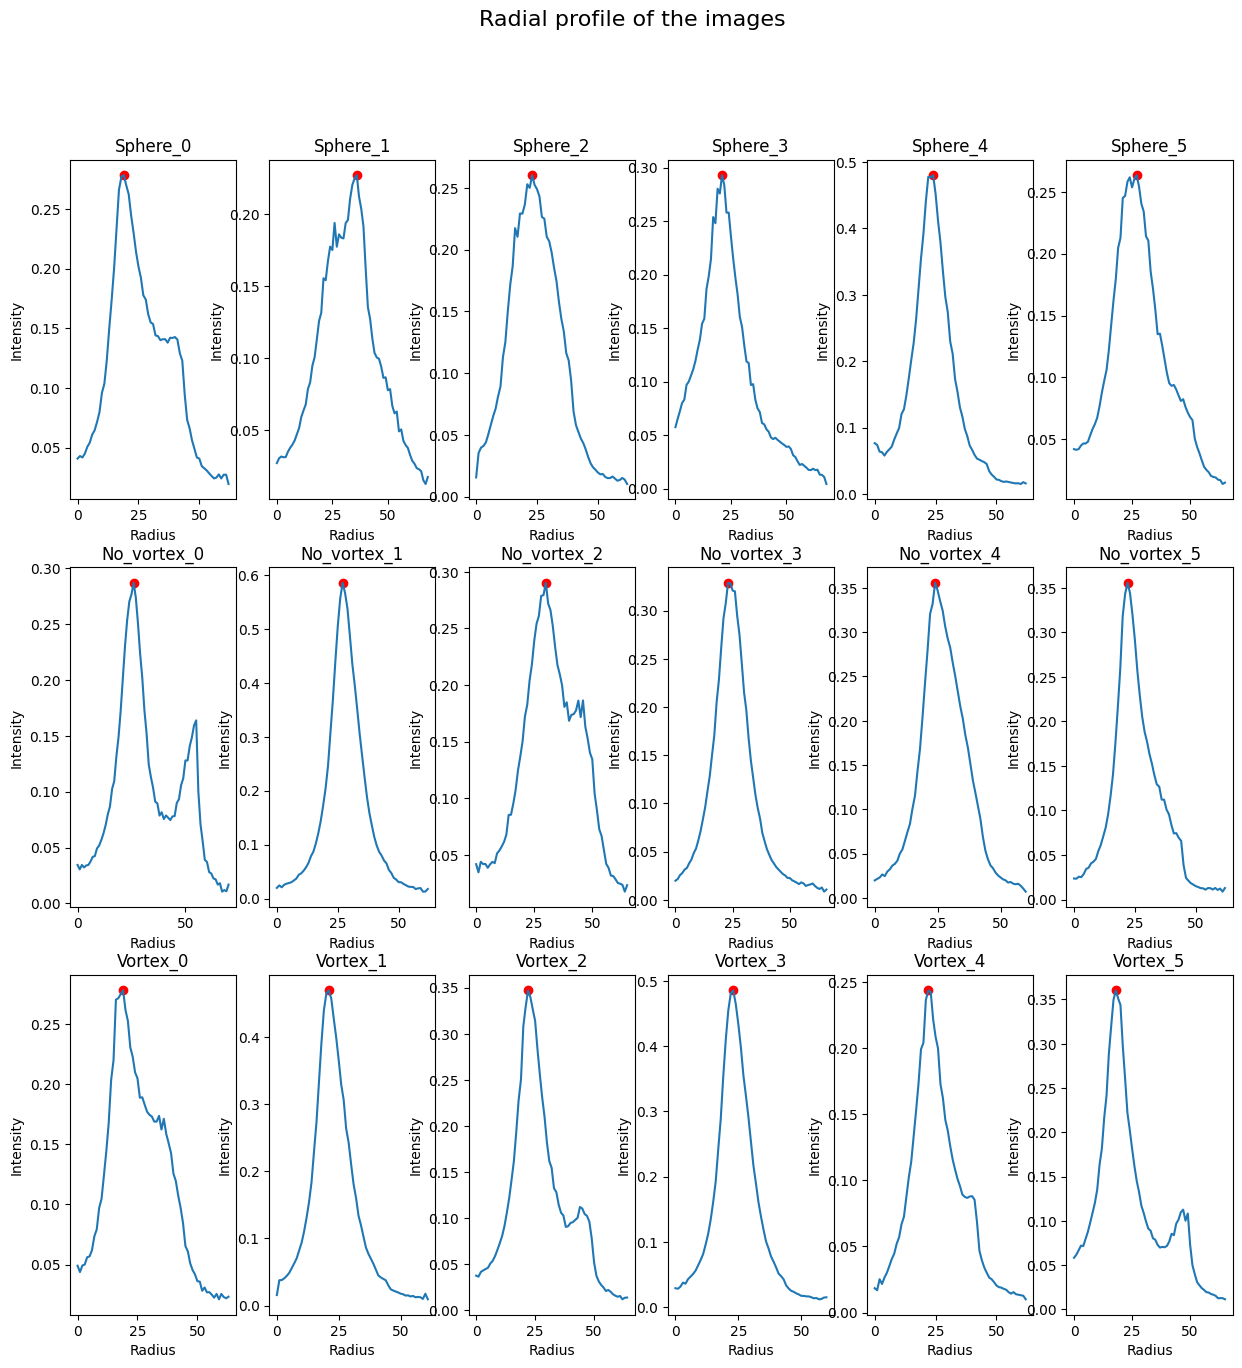

In [29]:

plot_radial_profile(shere_prepro_images, no_prepro_images, vortex_prepro_images)


# Image Segmentation

In [30]:
def draw_circle_and_calculate_intensity(img, center, radius):
    # Ensure the image is copied to avoid modifying the original image
    img_copy = img.copy()
    
    # Step 1: Draw the circle (for visualization, not necessary for intensity calculation)
    cv2.circle(img_copy, center, radius, (255, 0, 0), 1)  # Drawing with a blue circle
    
    intensity_values = []
    
    for degree in range(360):
        # Step 2: Calculate the perimeter point coordinates
        radian = np.deg2rad(degree)
        x_perimeter = int(center[0] + radius * np.cos(radian))
        y_perimeter = int(center[1] + radius * np.sin(radian))
        
        # Step 3: Average the 5x5 pixel area around the perimeter point
        x_start = max(x_perimeter - 2, 0)
        y_start = max(y_perimeter - 2, 0)
        x_end = min(x_perimeter + 3, img.shape[1])
        y_end = min(y_perimeter + 3, img.shape[0])
        
        pixel_area = img[y_start:y_end, x_start:x_end]
        average_intensity = np.mean(pixel_area, axis=(0, 1))
        
        # Step 4: Calculate the overall intensity as the average across the channels
        overall_intensity = np.mean(average_intensity)
        intensity_values.append(overall_intensity)
    
    return img_copy, intensity_values

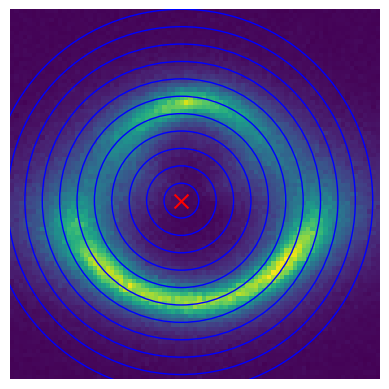

In [31]:
#plot the sphere image
plt.imshow(shere_prepro_images[4])
plt.scatter(sphere_centroids[0][1], sphere_centroids[0][0], c='r', s=100, marker='x')
#from the centroid make a circles of 15 pixel radius
for i in range(12):
    circle = plt.Circle((sphere_centroids[0][1], sphere_centroids[0][0]), 4*i, color='b', fill=False)
    plt.gca().add_artist(circle)
plt.axis('off')
plt.show()




In [32]:
#find the dominant pixel intesnisty in the image
def dominant_pixel_intensity(image):
    # Convert to grayscale if the image is in color
    if image.ndim == 3 and image.shape[2] in [3, 4]:  # Checking for RGB or RGBA
        image = image.mean(axis=2)  # Converting to grayscale by averaging channels

    # Find the unique pixel values and their counts
    unique_values, counts = np.unique(image, return_counts=True)

    # Find the pixel value with the highest count
    dominant_intensity = unique_values[np.argmax(counts)]
    return dominant_intensity

dominant_pixel_intensity(shere_prepro_images[2])

#show the particular pixel having intensity 0.015366430260047281


0.015366430260047281

# testing

In [33]:
multiimage_dict = {}

def find_intensity_eachset(data, centroids,circle,title):
    for i in range(len(data)):
        intensity_set = []
        for j in range(circle):
            intensity_values = draw_circle_and_calculate_intensity(data[i], (int(centroids[i][1]), int(centroids[i][0])), 4*j)[1]
            intensity_set.append(intensity_values)
        
        multiimage_dict[title+'_'+str(i)] = intensity_set

    return multiimage_dict

def find_intensity_eachset2(data, centroids,circle,title):
    for i in range(len(data)):
        intensity_set = []
        for j in range(circle):
            intensity_values = draw_circle_and_calculate_intensity2(data[i], (int(centroids[i][1]), int(centroids[i][0])), 4*j)[1]
            intensity_set.append(intensity_values)
        
        multiimage_dict[title+'_'+str(i)] = intensity_set

    return multiimage_dict

def find_intensity_eachset3(data, centroids,circle,title):
    
    
    for i in range(len(data)):
        multiimage_dict[title+'_'+str(i)] = [draw_circle_and_calculate_intensity2(data[i], (int(centroids[i][1]), int(centroids[i][0])), 4*j)[1] for j in range(circle)]        

    return multiimage_dict




In [34]:
%%timeit
sphere_multiimage_dict = find_intensity_eachset(shere_prepro_images, sphere_centroids, 12, 'Sphere')

c:\Users\harsh\anaconda3\envs\ml_cuda\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\harsh\anaconda3\envs\ml_cuda\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


443 ms ± 18 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [35]:
shere_prepro_images[0].shape

(85, 85)

In [197]:
%%timeit
sphere_multiimage_dict2 = find_intensity_eachset2(shere_prepro_images, sphere_centroids, 12, 'Sphere')

C:\Users\harsh\AppData\Local\Temp\ipykernel_9436\3867207291.py:34: RuntimeWarning: Mean of empty slice.
  return img[y_start[i]:y_end[i], x_start[i]:x_end[i]].mean()


120 ms ± 1.04 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [192]:
%%timeit
sphere_multiimage_dict2 = find_intensity_eachset3(shere_prepro_images, sphere_centroids, 12, 'Sphere')

C:\Users\harsh\AppData\Local\Temp\ipykernel_9436\4032482872.py:55: RuntimeWarning: Mean of empty slice.
  intensity_values = [ img[y_peremeters_360_start[i]:y_peremeters_360_end[i], x_peremeters_360_start[i]:x_peremeters_360_end[i]].mean() for i in range(360)]


118 ms ± 2.06 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


True

In [115]:
%%timeit
#covert all the values of dict to numpy array
sphere_multiimage_dict2 = {k: np.array(v) for k, v in sphere_multiimage_dict.items()}
# sphere_multiimage_dict['Sphere_0'].shape


843 µs ± 27 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


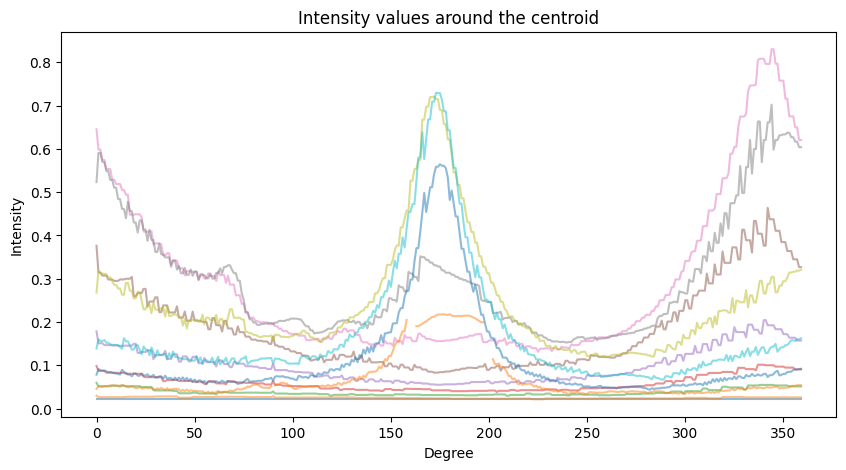

In [17]:
import matplotlib.pyplot as plt

plt.imshow(image_cropped)  # Use cmap='gray' for grayscale images
plt.axis('off')  # Optional: Remove axes for better visualization
plt.show()

NameError: name 'image_cropped' is not defined

In [ ]:
import os
def load_data_and_labels():
    x = []
    y = []

    # Assign labels to each class
    labels = {"no": 0, "sphere": 1, "vort": 2}

    for class_dir, label in labels.items():
        npy_files = os.listdir("train/{}".format(class_dir))  # List all files in the class directory
        for file in npy_files:
            file_path = os.path.join("train/{}".format(class_dir), file)
            data = np.load(file_path)
            x.append(data)
            y.append(label)

    return np.array(x), np.array(y)

# Assuming 'dataset_path' is the path to your 'dataset' directory
# class_dirs = {"train/no": 0, "train/sphere": 1, "train/vort": 2}
x, y = load_data_and_labels()




In [ ]:
# import pickle

# with open('train.pkl', 'wb') as f:
#     pickle.dump((x, y), f)

In [ ]:
import pickle
with open('train.pkl', 'rb') as f:
    x, y = pickle.load(f)

print(x.shape, y.shape)  # (number_of_samples, height, width) (number_of_samples,)

(30000, 1, 150, 150) (30000,)


In [ ]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(y, num_classes=3)

In [ ]:
import numpy as np

# Reshape X_train to the correct shape and duplicate the grayscale channel across 3 channels
X_train_rgb = np.repeat(x, 3, axis=1)

# Ensure the shape is now (24000, 3, 150, 150)
print(X_train_rgb.shape)

# If using TensorFlow, which expects the channel last format, you might need to transpose the axes
X_train_rgb = np.transpose(X_train_rgb, (0, 2, 3, 1))

# Ensure the shape is now (24000, 150, 150, 3) for TensorFlow
print(X_train_rgb.shape)


(30000, 3, 150, 150)
(30000, 150, 150, 3)


In [ ]:
# x = x.reshape(x.shape[0], -1) / 255.0


In [ ]:
import numpy as np
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.model_selection import train_test_split


# Example loading data
# X = np.load('your_dataset.npy')
# y = np.load('your_labels.npy')

# Resize your images to 224x224 if they are not already (this might require additional code)
# X_resized = resize_images(X)  # This is a placeholder function

# Preprocess input according to ResNet's requirements
X_processed = preprocess_input(X_train_rgb)


# Split dataset



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

In [ ]:
y_train

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [ ]:
X_train.shape

(24000, 150, 150, 3)

In [ ]:
# from sklearn.model_selection import train_test_split

# # Assuming X and y are your features and labels respectively
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [7]:
X_train.shape

(24000, 22500)

In [8]:
# from sklearn.svm import SVC
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler

# # It's often a good idea to scale your data for SVM
# svm_clf = make_pipeline(StandardScaler(), SVC(kernel='rbf', decision_function_shape='ovo', C=1))
# svm_clf.fit(X_train, y_train)


In [ ]:
# from thundersvm import SVC

# # Create an SVM classifier. Here you can specify the kernel and other parameters.
# clf = SVC(kernel='rbf', C=1, gamma=0.5)

# # Fit the model on the training data
# clf.fit(X_train, y_train)


In [ ]:
# # Predict on the test set
# y_pred = clf.predict(X_test)

# # Evaluate the predictions
# from sklearn.metrics import accuracy_score

# print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")


In [ ]:
# from sklearn.metrics import accuracy_score

# y_pred = svm_clf.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Test Accuracy: {accuracy}")


In [21]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load pre-trained ResNet50
base_model = ResNet50(weights='imagenet', include_top=False)

# Add new layers for your specific classification problem
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)  # New FC layer, change dims as needed
predictions = Dense(3, activation='softmax')(x)  # New softmax layer

model = Model(inputs=base_model.input, outputs=predictions)


In [23]:
for layer in base_model.layers:
    layer.trainable = False

# Compile model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model on new data
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
600/600 [==============================] - 278s 459ms/step - loss: 1.0987 - accuracy: 0.3320 - val_loss: 1.0992 - val_accuracy: 0.3250
Epoch 2/10
234/600 [==========>...................] - ETA: 2:14 - loss: 1.0987 - accuracy: 0.3392

KeyboardInterrupt: 

In [ ]:
# for layer in model.layers[:some_layer_index]:
#     layer.trainable = False
# for layer in model.layers[some_layer_index:]:
#     layer.trainable = True

# # Recompile the model for these modifications to take effect
# model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# # Continue training
# model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)


In [ ]:
model.evaluate(X_test, y_test)
